# Predictors of County Voting in the 2016 Presidential Election
## University of Pennsylvania STAT_177 Final Project
### Created by Michael Kim

## Introduction
* The 2016 Presidential Election featured Donald Trump, running on the Republican ticket, and Hillary Clinton, running on the Democratic ticket, both vying for the presidency.
* Despite losing the popular vote by over 2 million people, Donald Trump defeated Hillary Clinton with 304 electoral votes, compared to her 227 votes.
* By examining the county-level voting results, a better picture and summary of the election can be achieved, along with beginning to establish any relationships between party success in the election and various measurable variables on county inhabitants.
* The data being read and used concerns health, economic, and demographic characteristics of counties in the United States. Multiple libraries have been imported for summary and analysis of this data.

In [48]:
# Reading in all of the data and libraries needed for analysis.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

county_data = pd.read_csv("project_177.csv",
                          index_col='Row.Label')
county_data["Results"]=county_data["Election.Results.2016"]

## Defining the Y-Variable
* The y-variable, or outcome variable, being used in this analysis is whether a county had majority of Democrat or Republican votes in the 2016 presidential election.
* This is treated as a two-level categorical variable.
* By summarizing both x-variables, or predictor variables, and outcome variables at two different units of analysis, this can give a better understanding of relationships. 
* To do so, comparisons between predictor variables and the outcome variable can be drawn first at the State level, and then at the more specific county level.

## Key Questions
* For the analysis, the following few key questions will help guide the summarization and interpretation of data:
    * Do predictor variables have similar relationships with which party won on both the county and state level?
    * Do predictor variables with statistically significant relationships with the outcome variable appear to have some relationships with each other as well?
    * What are the strongest predictors of determining which party won majority of votes within a county during the 2016 presidential election?

## State Level Summarization
* Voter profiles for Trump voters and Clinton voters were examined closely following the 2016 election, with some citing distinct differences in demographic or environmental characteristics.
* Some of these include severe housing problems, community types (rural, suburban, or urban), and many more.
* By summarizing these at both state and local levels, this can offer a more complete picture of which predictor variables have a statistically significant relationship with the outcome variable.
* The first summarization and analysis will be done on the Average Percentage of Severe Housing Problems per County.

In [58]:
#New DataFrame for Severe Housing Problems and 2016 Election Results at State level
def state_data_housing():
    state_data_housing1=county_data.groupby("State.Abbreviation")
    state_data_housing2=state_data_housing1["Severe.Housing.Problems"].mean().to_frame(name="Severe_Housing_Problem_Percent")
    state_data_housing2["Election_Result_2016"]=["Republican","Republican","Republican","Republican","Democrat","Democrat",
                                          "Democrat","Democrat","Democrat","Republican","Republican","Democrat","Republican","Republican",
                                          "Democrat","Republican","Republican","Republican","Republican","Democrat","Democrat",
                                          "Democrat","Republican","Democrat","Republican","Republican","Republican","Republican",
                                          "Republican","Republican","Democrat","Democrat","Democrat","Democrat","Democrat","Republican",
                                          "Republican","Democrat","Republican","Democrat","Republican","Republican","Republican",
                                          "Republican","Republican","Democrat","Democrat","Democrat","Republican","Republican","Republican"]
    #Finding 5 highest and 5 lowest Average Severe Housing Problems Percent of Counties by State
    print(state_data_housing2.nlargest(5,["Severe_Housing_Problem_Percent"],keep="all"))
    print(state_data_housing2.nsmallest(5,["Severe_Housing_Problem_Percent"],keep="all"))

    #Boxplot and swarmplot of Severe Housing Problems vs. 2016 Election Results
    state_housing_boxplot=sns.catplot(x="Severe_Housing_Problem_Percent",y="Election_Result_2016",data=state_data_housing2,kind="box",height=4,aspect=2,palette='Set1');
    state_housing_boxplot.fig.suptitle("Percentage of Severe Housing Problems for 2016 Election Results by State")
    state_housing_swarmplot=sns.swarmplot(x="Severe_Housing_Problem_Percent",y="Election_Result_2016",data=state_data_housing2,size=3,color=".3",linewidth=0);

                    Severe_Housing_Problem_Percent Election_Result_2016
State.Abbreviation                                                     
HI                                        0.272175             Democrat
CA                                        0.234302             Democrat
DC                                        0.212300             Democrat
NJ                                        0.211229             Democrat
AZ                                        0.197540           Republican
                    Severe_Housing_Problem_Percent Election_Result_2016
State.Abbreviation                                                     
NE                                        0.103306           Republican
IA                                        0.104841           Republican
WV                                        0.106265           Republican
SD                                        0.107160           Republican
ND                                        0.110800           Rep

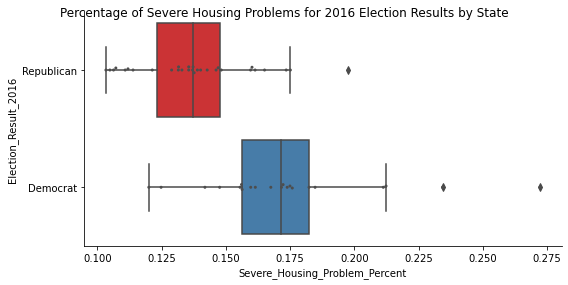

In [59]:
print(state_data_housing())

In [60]:
#Creating a simple regression model with Severe Housing Problems vs. 2016 Election Results
def state_data_housing_reg():
    state_data_housing1=county_data.groupby("State.Abbreviation")
    state_data_housing2=state_data_housing1["Severe.Housing.Problems"].mean().to_frame(name="Severe_Housing_Problem_Percent")
    state_data_housing2["Election_Result_2016"]=["Republican","Republican","Republican","Republican","Democrat","Democrat",
                                          "Democrat","Democrat","Democrat","Republican","Republican","Democrat","Republican","Republican",
                                          "Democrat","Republican","Republican","Republican","Republican","Democrat","Democrat",
                                          "Democrat","Republican","Democrat","Republican","Republican","Republican","Republican",
                                          "Republican","Republican","Democrat","Democrat","Democrat","Democrat","Democrat","Republican",
                                          "Republican","Democrat","Republican","Democrat","Republican","Republican","Republican",
                                          "Republican","Republican","Democrat","Democrat","Democrat","Republican","Republican","Republican"]
    pd.get_dummies(data=state_data_housing2["Election_Result_2016"])
    olsmod1=smf.ols(formula="Severe_Housing_Problem_Percent ~ Election_Result_2016", data=state_data_housing2)   
    olsres1=olsmod1.fit()  
    print(olsres1.summary())  
    

In [61]:
print(state_data_housing_reg())

                                  OLS Regression Results                                  
Dep. Variable:     Severe_Housing_Problem_Percent   R-squared:                       0.285
Model:                                        OLS   Adj. R-squared:                  0.270
Method:                             Least Squares   F-statistic:                     19.52
Date:                            Wed, 05 Oct 2022   Prob (F-statistic):           5.50e-05
Time:                                    15:38:11   Log-Likelihood:                 109.84
No. Observations:                              51   AIC:                            -215.7
Df Residuals:                                  49   BIC:                            -211.8
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025

## Analysis of Severe Housing Problem Percentage per County on State Level
* The 5 states/territories with the highest average percentage of severe housing problems per county include Hawaii, California, Washington D.C., New Jersey, and Arizona.
* The 5 states with the lowest average percentage of severe housing problems per county include Nebraska, Iowa, West Virginia, South Dakota, and North Dakota.
* From looking at this subsection of states and their voting pattern in the 2016 election, it would appear that states that voted Republican had a lower average percentage of severe housing problems per county.
* When examining the boxplot and simple regression of the variables, it appears that this notion holds true, with the relationship being statistically significant and having a p-value < 0.05.
* The next summarization and analysis will be done on a demographic variable, looking at the Average Percentage of Rural Area per County.

In [62]:
#New DataFrame for Average Rural Area of Counties and 2016 Election Results at State level
def state_data_rural():
    state_data_rural1=county_data.groupby("State.Abbreviation")
    state_data_rural2=state_data_rural1["Percent.Rural"].mean().to_frame(name="Percent_Rural")
    state_data_rural2["Election_Result_2016"]=["Republican","Republican","Republican","Republican","Democrat","Democrat",
                                          "Democrat","Democrat","Democrat","Republican","Republican","Democrat","Republican","Republican",
                                          "Democrat","Republican","Republican","Republican","Republican","Democrat","Democrat",
                                          "Democrat","Republican","Democrat","Republican","Republican","Republican","Republican",
                                          "Republican","Republican","Democrat","Democrat","Democrat","Democrat","Democrat","Republican",
                                          "Republican","Democrat","Republican","Democrat","Republican","Republican","Republican",
                                          "Republican","Republican","Democrat","Democrat","Democrat","Republican","Republican","Republican"]
    #Finding 5 highest and 5 lowest Average Rural Area of Counties by State
    print(state_data_rural2.nlargest(5,["Percent_Rural"],keep="all"))
    print(state_data_rural2.nsmallest(5,["Percent_Rural"],keep="all"))

    #Boxplot and swarmplot of Average Rural Area of Counties by State vs. 2016 Election Results
    state_rural_boxplot=sns.catplot(x="Percent_Rural",y="Election_Result_2016",data=state_data_rural2,kind="box",height=4,aspect=2,palette='Set1');
    state_rural_boxplot.fig.suptitle("Percentage of Rural Area for 2016 Election Results by State")
    state_rural_swarmplot=sns.swarmplot(x="Percent_Rural",y="Election_Result_2016",data=state_data_rural2,size=3,color=".3",linewidth=0);

                    Percent_Rural Election_Result_2016
State.Abbreviation                                    
ME                       0.741931             Democrat
VT                       0.712692             Democrat
KY                       0.705077           Republican
MT                       0.676014           Republican
SD                       0.662645           Republican
                    Percent_Rural Election_Result_2016
State.Abbreviation                                    
DC                         0.0000             Democrat
RI                         0.1151             Democrat
NJ                         0.1276             Democrat
MA                         0.1504             Democrat
HI                         0.1657             Democrat
None


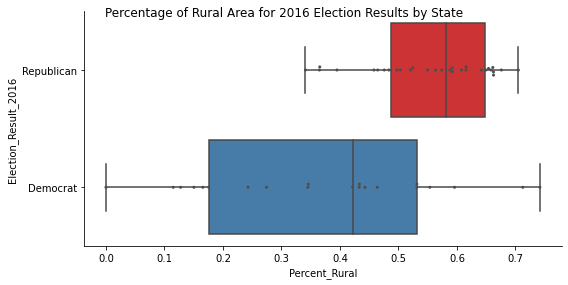

In [63]:
print(state_data_rural())

In [64]:
#Creating a simple regression model with Average Rural Area of Counties by State vs. 2016 Election Results
def state_data_rural_reg():   
    state_data_rural1=county_data.groupby("State.Abbreviation")
    state_data_rural2=state_data_rural1["Percent.Rural"].mean().to_frame(name="Percent_Rural")
    state_data_rural2["Election_Result_2016"]=["Republican","Republican","Republican","Republican","Democrat","Democrat",
                                          "Democrat","Democrat","Democrat","Republican","Republican","Democrat","Republican","Republican",
                                          "Democrat","Republican","Republican","Republican","Republican","Democrat","Democrat",
                                          "Democrat","Republican","Democrat","Republican","Republican","Republican","Republican",
                                          "Republican","Republican","Democrat","Democrat","Democrat","Democrat","Democrat","Republican",
                                          "Republican","Democrat","Republican","Democrat","Republican","Republican","Republican",
                                          "Republican","Republican","Democrat","Democrat","Democrat","Republican","Republican","Republican"]
    pd.get_dummies(data=state_data_rural2["Election_Result_2016"])
    olsmod2=smf.ols(formula="Percent_Rural ~ Election_Result_2016",data=state_data_rural2)
    olsres2=olsmod2.fit()
    print(olsres2.summary())

In [65]:
print(state_data_rural_reg())

                            OLS Regression Results                            
Dep. Variable:          Percent_Rural   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     18.00
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           9.77e-05
Time:                        15:44:13   Log-Likelihood:                 24.647
No. Observations:                  51   AIC:                            -45.29
Df Residuals:                      49   BIC:                            -41.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

## Analysis of Rural Area Percentage per County on State Level
* The 5 states with the highest percentage of rural area per county include Maine, Vermont, Kentucky, Montana, and South Dakota.
* The 5 states/territories with the lowest percentage of rural area per county include Washington D.C., Rhode Island, New Jersey, Massachusetts, and Hawaii. 
* From looking at this subsection of states and their voting pattern in the 2016 election, it would appear that states who voted Democratic had lower rural area percentage per county, despite the two states with the highest average percentage of rural area per county being Democratic.
* When examining the boxplot and simple regression of the variables, it appears that this notion is supported, with the relationship being statistically significant and having a p-value < 0.05.

## County Level Summarization
* From state level summarization, we have established two statistically significant relationships:
    1. Average Rural Percentage Per County and 2016 State Election Results
    2. Average Severe Housing Problem Percentage Per County and 2016 State Election Results
* By analyzing these same predictor variables at a county level, this will answer questions of a possible relationship on a county level with the outcome variable.
* This will also offer insight into whether the predictor variables have similar relationships at both the state and county levels.
* The first plot and analysis will be on the same Percentage of Severe Housing Problems per County data.

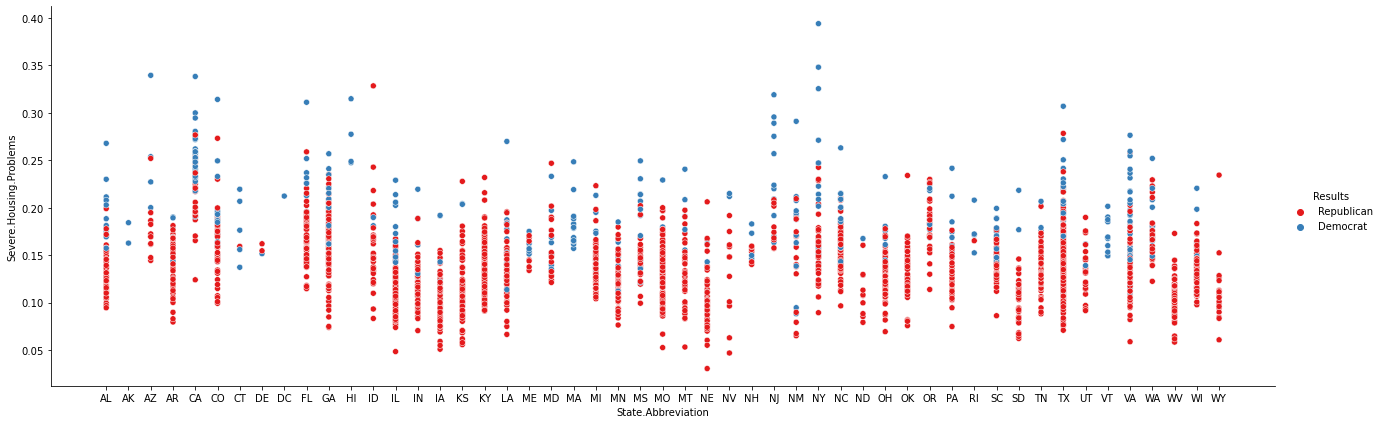

In [66]:
#Plot of Severe Housing Problem Percentages by State with hue of 2016 Election Results
housing_plot=sns.relplot(x="State.Abbreviation",y="Severe.Housing.Problems",hue="Results",palette="Set1",data=county_data,height=6,aspect=3);

## Analysis of Severe Housing Problem Percentage per County on County Level
* From looking at the previous plot of Severe Housing Problem Percentages for counties in various states, it appears that Democratic counties tend to have higher levels of Severe Housing Problems.
* It should also be noted that states with major urban cities, like California and New York, have outliers with higher severe housing problems.
* The next plot and analysis will be done on the same Average Percentage of Rural Area per County data.

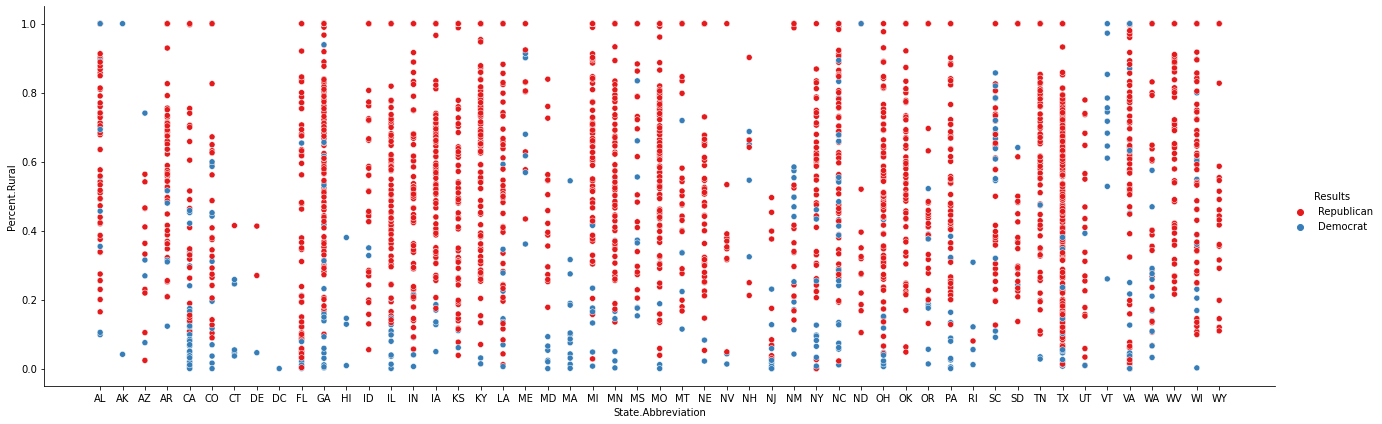

In [67]:
rural_plot=sns.relplot(x="State.Abbreviation",y="Percent.Rural",hue="Results",palette="Set1",data=county_data,height=6,aspect=3);

## Analysis of Rural Area Percentage per County on County Level
* From looking at the previous plot of Rural Area Percentages for counties in various states, there does not appear to be a definitive pattern, although counties that voted Republican do seem to have higher rural area percentages.
* It should also be noted that almost all counties that were 100% rural voted Republican, and almost all counties that were 0% rural voted Democratic.
* By summarizing the data of both Rural Area Percentage and Severe Housing Problems through simple regressions, clearer relationships can be established. 
* The next summaries will be of Severe Housing Problems and Rural Area Percentage, respectively.

In [68]:
#Severe Housing Problems Simple Regression
county_data1=county_data
county_data1["Severe_Housing_Problems"]=county_data1["Severe.Housing.Problems"]
county_data1["Election_Results"]=county_data1["Election.Results.2016"]
olsmod3=smf.ols(formula="Severe_Housing_Problems ~ Election_Results",data=county_data1)
olsres3=olsmod3.fit()
print(olsres3.summary())

#Rural Area Percentage Simple Regression
county_data1["Percent_Rural"]=county_data1["Percent.Rural"]
olsmod4=smf.ols(formula="Percent_Rural ~ Election_Results",data=county_data1)
olsres4=olsmod4.fit()
print(olsres4.summary())

                               OLS Regression Results                              
Dep. Variable:     Severe_Housing_Problems   R-squared:                       0.254
Model:                                 OLS   Adj. R-squared:                  0.254
Method:                      Least Squares   F-statistic:                     922.7
Date:                     Wed, 05 Oct 2022   Prob (F-statistic):          1.04e-174
Time:                             15:49:11   Log-Likelihood:                 5219.8
No. Observations:                     2715   AIC:                        -1.044e+04
Df Residuals:                         2713   BIC:                        -1.042e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

## Analysis of Summaries on County Level
* The simple regression of Severe Housing Problems shows that it has a statistically significant effect on the 2016 Presidential Election Results by county, since p-value < 0.05. 25.4% of the variation in Severe Housing Problem percentages were explainable by Election Results, establishing the association between the two.
* The simple regression of Rural Area Percentage also shows that it has a statistically significant effect on the 2016 Presidential Election Results by county, since p-value < 0.05. 25.4% of the variation in Rural Area percentage were explainable by Election Results, establishing the association between the two.
* These summaries and previous graphs displays the similarities between relationships of x and y-variables on both the state and county level. Severe Housing Problems and Rural Area Percentage both had statistically significant associations with the Election Results for the Presidential Election on the state and county level and a measurable effect that one has on the other.
* We can further look at the relationship between these predictor variables, and others, to see interesting patterns that arise.

## Predictor Variable Relationships
* Examining the relationships between predictor variables like Severe Housing Problems and Rural Area Percentages can help better understand the underlying causes of why certain trends may exist.
* The first plot will be made comparing the Rural Area Percentage and Severe Housing Problems. 
    * For this plot, the data of Rural Area Percentage has been discretized. 
* The second plot shows the relationship between Severe Housing Problems and another predictor variable, Percentage of Uninsured Residents. 
    * A hue has also been used on this plot to show the differences between counties based on 2016 Election Results.

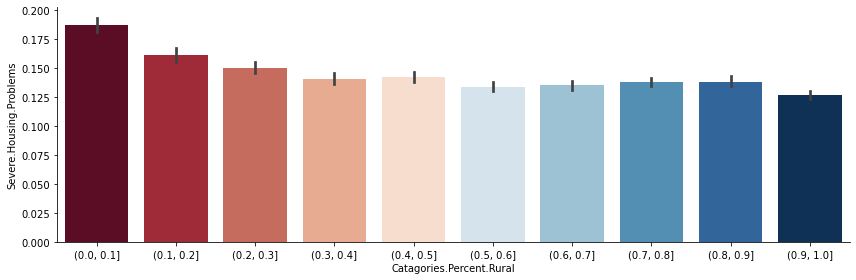

In [69]:
#Barchart of Categorized Percentage Rural Area vs Severe Housing Problems
seq_colors=['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7','#d1e5f0','#92c5de','#4393c3','#2166ac','#053061']
custom_palette=sns.color_palette(seq_colors)
county_data["Catagories.Percent.Rural"]=pd.cut(county_data["Percent.Rural"],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
g=sns.catplot(x='Catagories.Percent.Rural',y='Severe.Housing.Problems',kind='bar',palette=custom_palette,data=county_data,height=4,aspect=3)

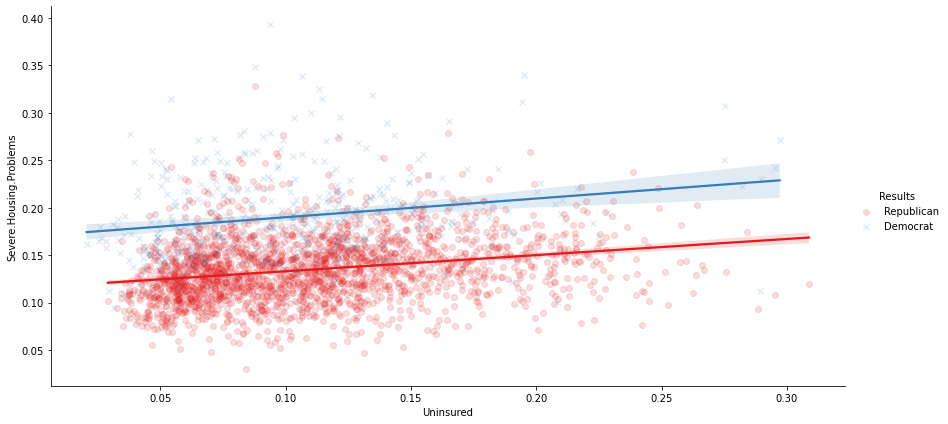

In [70]:
#Plot of Uninsured vs Severe Housing Problems with hue of Election Results
uninsured_plot=sns.lmplot(x="Uninsured",y="Severe.Housing.Problems",hue="Results",data=county_data,markers=["o","x"],palette="Set1",scatter_kws={"alpha":0.15},line_kws={"alpha":1},height=6,aspect=2);

## Analysis of Graphical Summaries
* The first plot appears to show a relationship between the Categorized Rural Area Percentage and Severe Housing Problems within the counties. 
    * The lower the percentage of rural area in the county, the greater the severe housing problems.
    * This appears to be logical given that the counties that voted Democratic had lower rural area percentages and higher severe housing problems.
* The second plot appears to show a relationship between the Percentage of Uninsured and Severe Housing Problems within the counties.
    * The higher the percentage of uninsured, the greater the severe housing problems.
    * This signifies that many patterns exist when comparing similar environmental characteristics.
    * The plot also reaffirms the relationship between higher severe housing problems and counties that voted Democratic.

## Regression Tree
* Now that relationships between predictor variables and the outcome variable have been established on both the state and county level, a regression tree can be created to determine the importance of predictor variables.
    * The regression tree can show how the predictor variables can be used to predict whether a county voted Republican or Democratic.

In [26]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
def reg_tree():
    #Getting categorical and continuous variables:
    Xcts=county_data[["Uninsured","Primary.Care.Physicians.Per.1000","Mental.health.providers.Per.1000","Adult.Obesity",
                 "Proportion.of.Smokers","High.School.Graduation","Insufficient.Sleep","Physical.Inactivity",
                 "Excessive.Drinking","Median.Household.Income","Severe.Housing.Problems","Unemployment",
                 "Percent.Rural","Over.65","Percent.Females","Life.Expectancy","Population"]]
    Xcat=pd.get_dummies(county_data[["Food.Insecurity.Quintile","Income.Inequality.Quartile","State.Abbreviation"]],drop_first=True)
    #Merge continuous and categorical variables into single dataset.
    X=pd.merge(Xcts,Xcat,left_index=True,right_index=True)
    y=pd.get_dummies(county_data["Election.Results.2016"])

    #Splitting into test and train

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)    #A 50/50 split.

    dtr=tree.DecisionTreeRegressor(random_state=0)
    path=dtr.cost_complexity_pruning_path(X_train,y_train)
    ccp_alphas,impurities=path.ccp_alphas,path.impurities

    rgrs=[]
    for ccp_alpha in ccp_alphas:
        dtr=tree.DecisionTreeRegressor(random_state=0,ccp_alpha=ccp_alpha)
        dtr.fit(X_train,y_train)
        rgrs.append(dtr)
    
    rgrs=rgrs[:-1] #Remove simplest tree with no branches.
    ccp_alphas=ccp_alphas[:-1]

    node_counts=[dtr.tree_.node_count for dtr in rgrs]
    depth=[dtr.tree_.max_depth for dtr in rgrs]

    train_scores=[dtr.score(X_train,y_train) for dtr in rgrs]
    test_scores=[dtr.score(X_test,y_test) for dtr in rgrs]

    best=pd.Series(test_scores).idxmax()
    ccp_alphas[best]

    best_tree=rgrs[best]
    fig=plt.figure(num=None,figsize=(12,6),dpi=80,facecolor="w",edgecolor="k")
    tree.plot_tree(best_tree,filled=True,feature_names=X.columns);

    importances=pd.DataFrame({"feature":X_train.columns,"importance":np.round(best_tree.feature_importances_,3)})
    importances=importances.sort_values("importance",ascending=False)
    print(importances[:5])

                             feature  importance
12                     Percent.Rural       0.568
10           Severe.Housing.Problems       0.280
7                Physical.Inactivity       0.084
2   Mental.health.providers.Per.1000       0.068
54             State.Abbreviation_NJ       0.000
None


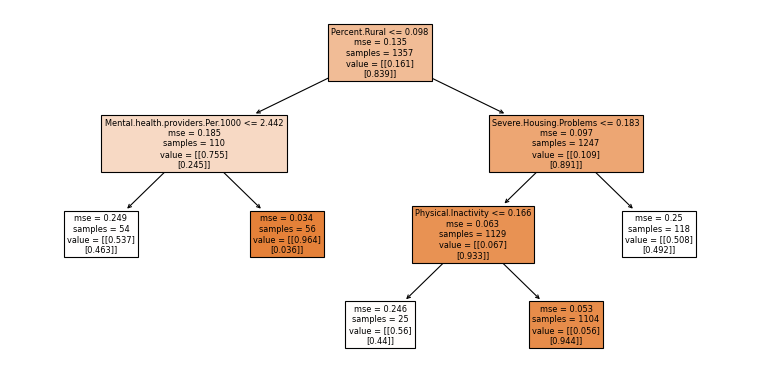

In [27]:
print(reg_tree())

## Analysis of Regression Tree
* The list of importances displays that the most important predictors variables are Rural Area Percentage and Severe Housing Problems for the 2016 Election Results by county. 
    * Physical Inactivity and Mental Health Providers per 1000 were also slightly important, although much less than the prior two.
* The regression tree also supports this, with the root node being the predictor variable Rural Area Percentage.
    * The only other node that isn't a terminal node is the Severe Housing Problems, showing it is next in importance for the tree.
* Key terms in the tree also support this notion:
    * The term that has a Percent.Rural <= 0.098 and Mental.health.providers.Per.1000 >= 2.442 has roughly 96.4% of the 56 counties as Democratic. This would appear logical given that these may be counties with major cities that have lots of mental health providers, supporting the idea that more urban counties tend to vote Democratic.
    * Also, the term that has a Percent.Rural >= 0.098, Severe.Housing.Problems <= 0.183, and Physical.Inactivity >= 0.166 has roughly 94.4% of the 1104 counties as Republican. This supports the idea that more rural counties with less severe housing problems tend to vote Republican. 

## Conclusions
* The summarization of data has revealed relationships and patterns between predictor variables and the outcome variable.
    * Counties that had higher percentages of rural area and/or lower levels of severe housing problems tended to vote Republican in the 2016 Presidential Election.
* In addition, many predictor variables that had statistically significant relationships with the outcome variable had relationships to one another.
    * When comparing percentage of rural area and severe housing problems, the more rural an area was, the less severe housing problems existed.
    * Also, comparing percentage of uninsured and severe housing problems revealed that relationships also exist between characteristics that share similar underlying causes.
* Finally, the predictor variables of highest importance in predicting how a county voted was the percentage of rural area and level of severe housing problems, with physical inactivity and mental health providers per 1000 also having a small degree of importance.
* While there exists relationships in this data between predictor variables and the county level election results, it still appears that predicting how a county voted in the election solely based on predictor variables with a high accuracy is difficult. 